# classification (ionosphere)_짝수

## 0. 데이터 전처리

### 0.1 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv('ionosphere.csv')

### 0.2 데이터 전처리

#### EDA 결과 처음 두 변수 지움

In [3]:
data.drop(columns=['attribute1','attribute2'], inplace=True)

#### 컬럼 이름 해석하기 쉽게 바꿈: 관측소1-1, 관측소1-2.....

In [4]:
data.columns = ['ob1-1', 'ob1-2', 'ob2-1', 'ob2-2', 'ob3-1', 'ob3-2', 'ob4-1', 'ob4-2', 'ob5-1', 'ob5-2', 'ob6-1', 'ob6-2', 'ob7-1', 'ob7-2', 'ob8-1', 'ob8-2', 'ob9-1', 'ob9-2', 'ob10-1', 'ob10-2', 'ob11-1', 'ob11-2', 'ob12-1', 'ob12-2', 'ob13-1', 'ob13-2', 'ob14-1', 'ob14-2', 'ob15-1', 'ob15-2', 'ob16-1', 'ob16-2', 'target']

#### 짝수번째 값만 사용(홀수번째 버림)

In [5]:
data.drop(columns = ['ob1-1', 'ob2-1', 'ob3-1', 'ob4-1', 'ob5-1', 'ob6-1', 'ob7-1', 'ob8-1', 'ob9-1', 'ob10-1', 'ob11-1', 'ob12-1', 'ob13-1', 'ob14-1', 'ob15-1', 'ob16-1']
, inplace=True)

In [6]:
data.head()

,ob1-2,ob2-2,ob3-2,ob4-2,ob5-2,ob6-2,ob7-2,ob8-2,ob9-2,ob10-2,ob11-2,ob12-2,ob13-2,ob14-2,ob15-2,ob16-2,target
0,-0.05889,0.02306,-0.37708,0.03760,-0.17755,-0.44945,-0.38223,-0.38542,-0.32192,-0.29674,-0.47357,-0.51171,-0.46168,-0.34090,-0.54487,-0.45300,0
1,-0.18829,-0.36156,-0.93597,-0.04549,-0.67743,-0.69707,-0.97515,-0.62237,-1.00000,-0.45300,-0.35734,-0.26569,-0.18401,-0.11593,-0.06288,-0.02447,1
2,-0.03365,0.00485,-0.12062,0.01198,0.05346,0.00827,0.00299,-0.13644,-0.08540,-0.27502,-0.12062,-0.40220,-0.22145,-0.17365,-0.24180,-0.38238,0
3,-0.45161,1.00000,-1.00000,0.00000,0.00000,0.00000,0.14516,-0.39330,-0.54467,1.00000,0.00000,0.90695,1.00000,-0.20099,1.00000,1.00000,1
4,-0.02401,0.06531,-0.23255,-0.16399,-0.20275,-0.00712,-0.27457,-0.21780,-0.17813,-0.35575,-0.52879,-0.65158,-0.53206,-0.62197,-0.59573,-0.65697,0


target에서 0 이 good, 1 이 bad

In [7]:
data.describe()

,ob1-2,ob2-2,ob3-2,ob4-2,ob5-2,ob6-2,ob7-2,ob8-2,ob9-2,ob10-2,ob11-2,ob12-2,ob13-2,ob14-2,ob15-2,ob16-2,target
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.044372,0.115889,0.119360,0.181345,0.155040,0.093414,0.071132,-0.003617,-0.024025,0.008296,-0.057406,-0.071187,-0.069538,-0.027907,-0.003794,0.014480,0.358974
std,0.441435,0.460810,0.520750,0.483851,0.494817,0.494873,0.458371,0.496762,0.519076,0.518166,0.527456,0.508495,0.550025,0.507974,0.513574,0.468337,0.480384
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-0.064735,-0.024795,-0.054840,-0.048075,-0.065265,-0.073725,-0.081705,-0.225690,-0.234670,-0.243870,-0.366885,-0.332390,-0.443165,-0.236885,-0.242595,-0.165350,0.000000
50%,0.016310,0.022800,0.014710,0.018290,0.028250,0.030270,0.000000,0.000000,0.000000,0.000000,0.000000,-0.015050,-0.017690,0.000000,0.000000,0.000000,0.000000
75%,0.194185,0.334655,0.445675,0.534195,0.482375,0.374860,0.308975,0.195285,0.134370,0.188760,0.164630,0.156765,0.153535,0.154075,0.200120,0.171660,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


모든 변수 (-1,1) 이므로 따로 scaling X

In [8]:
data.isnull().sum()

ob1-2     0
ob2-2     0
ob3-2     0
ob4-2     0
ob5-2     0
ob6-2     0
ob7-2     0
ob8-2     0
ob9-2     0
ob10-2    0
ob11-2    0
ob12-2    0
ob13-2    0
ob14-2    0
ob15-2    0
ob16-2    0
target    0
dtype: int64

결측치 존재X

In [9]:
data.shape

(351, 17)

## 1. Logistic Regression

### 1.1 train test 분리

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.head()

6      0
52     0
114    1
45     1
106    1
Name: target, dtype: int64

### 1.2 modeling

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logreg = LogisticRegression(solver='lbfgs')

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
logreg.classes_

array([0, 1], dtype=int64)

In [15]:
logreg.intercept_

array([-0.56576977])

In [16]:
logreg.coef_

array([[-0.69365401, -0.60833264, -0.64382149,  0.06292724,  0.15364212,
        -0.64312743, -0.56440648, -0.7113817 ,  0.39778308,  0.54016036,
         0.00082027, -0.16221805, -0.11892598, -0.22424969,  0.47163029,
         0.58605879]])

In [17]:
y_pred_t = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

In [18]:
train_acc = logreg.score(X_train, y_train)
test_acc = logreg.score(X_test, y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')

Train_Accuracy: 0.7535714285714286
Test_Accuracy: 0.704225352112676


### 1.3 Confusion Matrix / AUROC

#### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

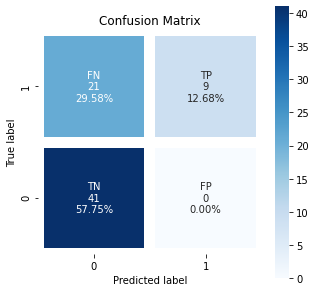

In [20]:
con_mat = confusion_matrix(y_test, y_pred, labels=[0,1])

group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in con_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in con_mat.flatten()/np.sum(con_mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(con_mat, annot=labels, cmap = "Blues", fmt="", linewidths=10, square=True)
ax.set_ylim([0,2])
ax.set_title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label' + "")
plt.show()

#### AUROC

In [21]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

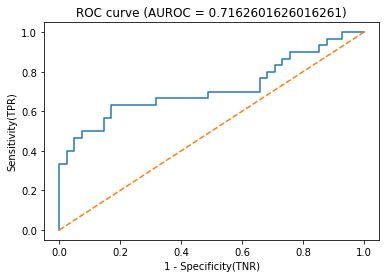

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(X_test)) 

plt.plot(fpr, tpr)
#plt.fill_between(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('1 - Specificity(TNR)')
#plt.xlabel('거짓 양성 비율(FPR)')
plt.ylabel('Sensitivity(TPR)')

auc_s = auc(fpr, tpr) # auc(score)
plt.title('ROC curve (AUROC = {})'.format(auc_s))
plt.show()

#### 각 성능 지표

In [23]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80        41
           1       1.00      0.30      0.46        30

    accuracy                           0.70        71
   macro avg       0.83      0.65      0.63        71
weighted avg       0.80      0.70      0.65        71



In [25]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f"Precision: {precision_score(y_test, y_pred, average='binary')}")
print(f"Recall: {recall_score(y_test, y_pred, average='binary')}")
print(f"F1-score: {f1_score(y_test, y_pred, average='binary')}")

Accuracy: 0.704225352112676
Precision: 1.0
Recall: 0.3
F1-score: 0.4615384615384615


## 2. Decision Tree

In [56]:
col_names = ['ob1-2', 'ob2-2', 'ob3-2', 'ob4-2', 'ob5-2', 'ob6-2', 'ob7-2', 'ob8-2', 'ob9-2', 'ob10-2', 'ob11-2', 'ob12-2', 'ob13-2', 'ob14-2', 'ob15-2', 'ob16-2']

30번 반복

### 2.1 train test 분리

In [57]:
from sklearn.model_selection import train_test_split

In [94]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_test.head()

342    0
80     0
162    1
327    0
51     1
Name: target, dtype: int64

### 2.2 modeling & visualization & 성능평가 : Gini index

#### modeling

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 4) 

DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
train_acc = DT.score(X_train, y_train)
test_acc = DT.score(X_test, y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')

Train_Accuracy: 0.8678571428571429
Test_Accuracy: 0.8591549295774648


#### visualization

In [98]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
import graphviz

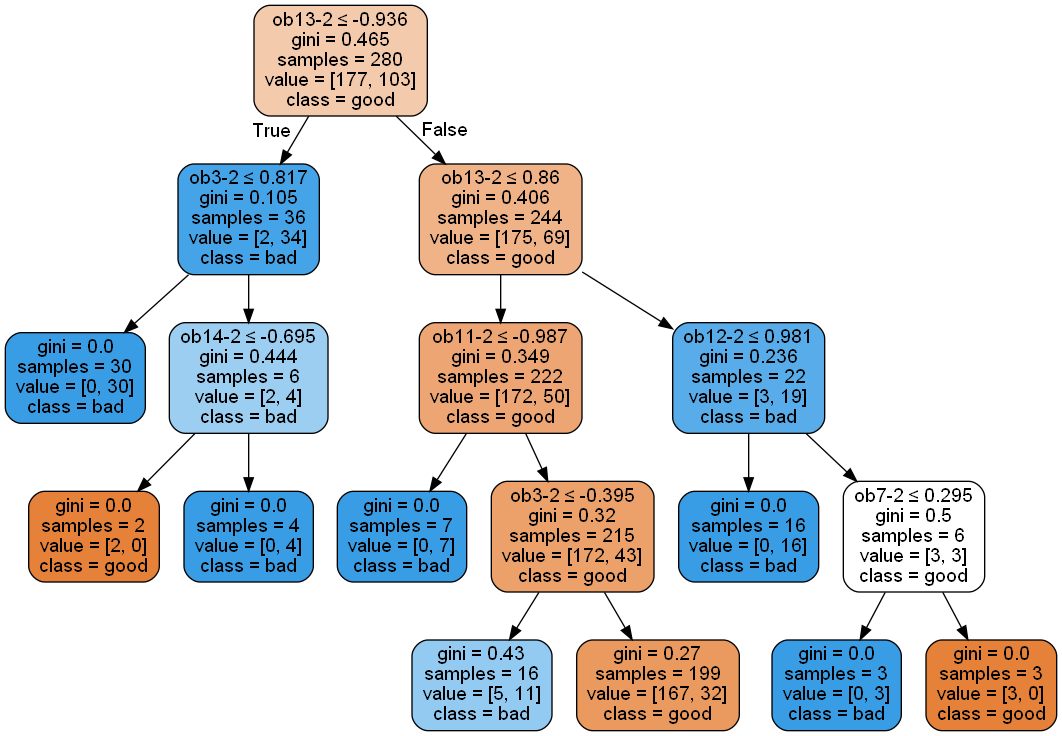

In [99]:
dot_data = StringIO()
dot_data = export_graphviz(DT, out_file = None, feature_names = col_names,
                          class_names=['good','bad'], filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Confusion Matrix

In [100]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
y_pred = DT.predict(X_test)

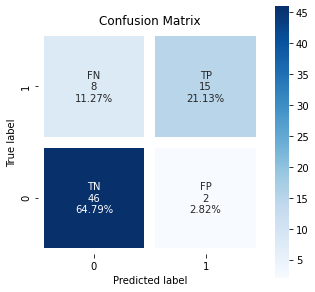

In [102]:
con_mat = confusion_matrix(y_test, y_pred, labels=[0,1])

group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in con_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in con_mat.flatten()/np.sum(con_mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(con_mat, annot=labels, cmap = "Blues", fmt="", linewidths=10, square=True)
ax.set_ylim([0,2])
ax.set_title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label' + "")
plt.show()

#### AUROC

In [103]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

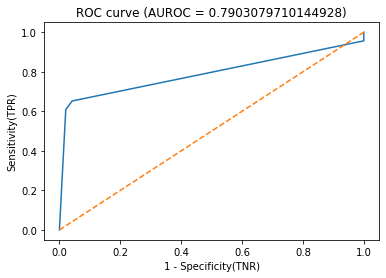

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1]) 

plt.plot(fpr, tpr)
#plt.fill_between(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('1 - Specificity(TNR)')
#plt.xlabel('거짓 양성 비율(FPR)')
plt.ylabel('Sensitivity(TPR)')

auc_s = auc(fpr, tpr) # auc(score)
plt.title('ROC curve (AUROC = {})'.format(auc_s))
plt.show()

#### 각 성능 지표

In [105]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        48
           1       0.88      0.65      0.75        23

    accuracy                           0.86        71
   macro avg       0.87      0.81      0.83        71
weighted avg       0.86      0.86      0.85        71



In [107]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f"Precision: {precision_score(y_test, y_pred, average='binary')}")
print(f"Recall: {recall_score(y_test, y_pred, average='binary')}")
print(f"F1-score: {f1_score(y_test, y_pred, average='binary')}")

Accuracy: 0.8591549295774648
Precision: 0.8823529411764706
Recall: 0.6521739130434783
F1-score: 0.75


## 3. Random Forest

### 3.1 train test 분리

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.head()

6      0
52     0
114    1
45     1
106    1
Name: target, dtype: int64

### 3.2 modeling

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
RF = RandomForestClassifier(n_estimators=100, oob_score=True,
                            criterion='gini', max_depth=4, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
print(RF.estimators_[:3])
print(len(RF.estimators_))

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1608637542, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1273642419, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', m

### 3.3 Feature Importance

In [34]:
import matplotlib.pyplot as plt

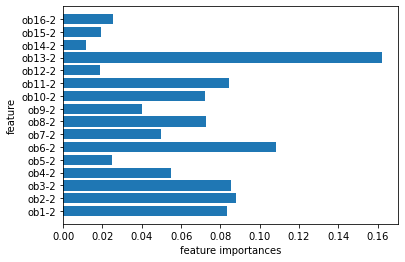

In [35]:
def plot_feature_importances(model):

    n_features = X.shape[1]
    idx = np.arange(n_features)

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features))
    plt.yticks(idx, col_names[:])

    plt.xlabel("feature importances")

    plt.ylabel("feature")

    plt.ylim(-1, n_features)

plot_feature_importances(RF)
plt.show()

In [36]:
# oob_score -> test data로 성능 평가와 비슷
## train data 중 포함되지 않은 data로 성능측정
RF.oob_score_

0.8285714285714286

### 3.4 visualization

In [37]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
import graphviz

C:\Users\yebin\anaconda3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


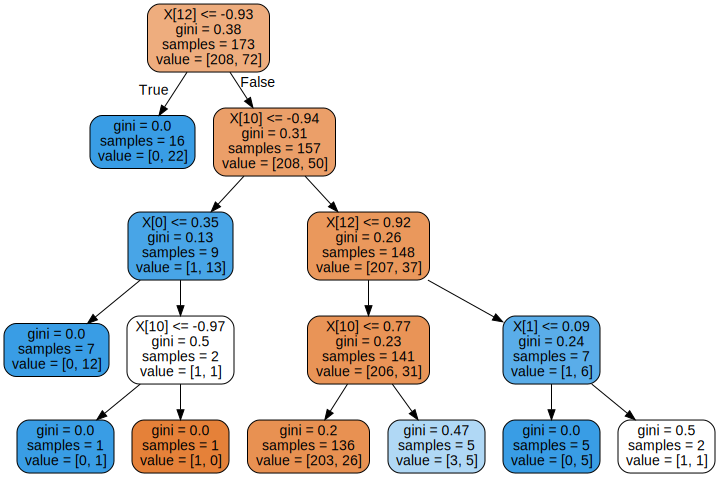

In [38]:
# randomforest 중 일부 트리 graph화
estimator = RF.estimators_[5]

dot_data = export_graphviz(estimator, 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

### 3.5 성능평가

#### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
y_pred = RF.predict(X_test)

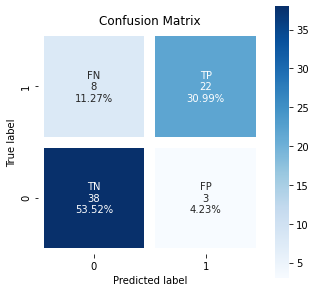

In [41]:
con_mat = confusion_matrix(y_test, y_pred, labels=[0,1])

group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in con_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in con_mat.flatten()/np.sum(con_mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(con_mat, annot=labels, cmap = "Blues", fmt="", linewidths=10, square=True)
ax.set_ylim([0,2])
ax.set_title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label' + "")
plt.show()

#### AUROC

In [42]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

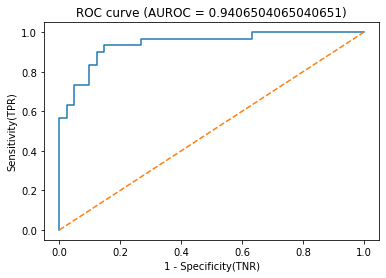

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1]) 

plt.plot(fpr, tpr)
#plt.fill_between(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('1 - Specificity(TNR)')
#plt.xlabel('거짓 양성 비율(FPR)')
plt.ylabel('Sensitivity(TPR)')

auc_s = auc(fpr, tpr) # auc(score)
plt.title('ROC curve (AUROC = {})'.format(auc_s))
plt.show()

#### 각 성능 지표

In [44]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.88      0.73      0.80        30

    accuracy                           0.85        71
   macro avg       0.85      0.83      0.84        71
weighted avg       0.85      0.85      0.84        71



In [46]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f"Precision: {precision_score(y_test, y_pred, average='binary')}")
print(f"Recall: {recall_score(y_test, y_pred, average='binary')}")
print(f"F1-score: {f1_score(y_test, y_pred, average='binary')}")

Accuracy: 0.8450704225352113
Precision: 0.88
Recall: 0.7333333333333333
F1-score: 0.8


## 4. Gradient Boosting

### 4.1 train test 분리

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.head()

6      0
52     0
114    1
45     1
106    1
Name: target, dtype: int64

### 4.2 modeling

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
GB = GradientBoostingClassifier(n_estimators=100, random_state=42)

GB.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [112]:
y_pred = GB.predict(X_train)

100
[1.20028912 1.13289437 1.07279737 1.02325668 0.98181885 0.94381579
 0.89271484 0.86312661 0.8358784  0.8099776  0.77543723 0.7455536
 0.7263883  0.70859992 0.68456031 0.65190288 0.6352255  0.60976556
 0.59036984 0.56844391 0.55019472 0.52315727 0.50203495 0.48356449
 0.46389768 0.44542314 0.42931772 0.42087365 0.40530715 0.39227018
 0.37991966 0.37190415 0.35997027 0.35322635 0.34229947 0.32783142
 0.32093805 0.31588445 0.30584234 0.29461575 0.28993696 0.28438409
 0.27654321 0.27255081 0.26286179 0.25344608 0.24668439 0.23647892
 0.23005778 0.22707979 0.21866879 0.21491402 0.20615963 0.20264204
 0.19939618 0.19355878 0.18899116 0.18581715 0.18109439 0.17669122
 0.1732497  0.16790417 0.16393395 0.15940375 0.15435931 0.15253887
 0.15059544 0.14840293 0.14411817 0.14196569 0.13990071 0.13670452
 0.13231755 0.13020835 0.12666573 0.1238417  0.12132401 0.11890099
 0.11457634 0.11284076 0.10994463 0.10709121 0.10473041 0.10238293
 0.099675   0.09830316 0.09659842 0.09552722 0.09392875 0.0

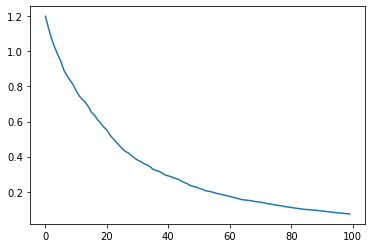

In [113]:
# staged_score 새로운 data에 대해서 누적한 값
# 그 누적값을 학습한 값들을 기록함 
print(len(GB.train_score_))
print(GB.train_score_)

# residual이니깐 계속 값이 떨어지는 것임
plt.plot(GB.train_score_)

#### Confusion Matrix

In [114]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
y_pred = GB.predict(X_test)

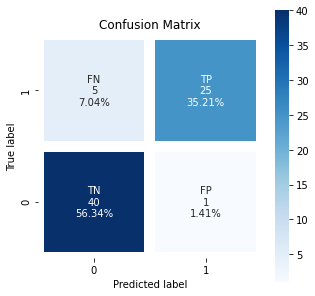

In [116]:
con_mat = confusion_matrix(y_test, y_pred, labels=[0,1])

group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in con_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in con_mat.flatten()/np.sum(con_mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(con_mat, annot=labels, cmap = "Blues", fmt="", linewidths=10, square=True)
ax.set_ylim([0,2])
ax.set_title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label' + "")
plt.show()

#### AUROC

In [117]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

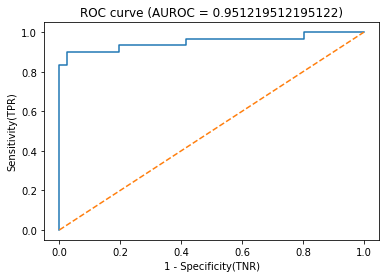

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, GB.decision_function(X_test)) 

plt.plot(fpr, tpr)
#plt.fill_between(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('1 - Specificity(TNR)')
#plt.xlabel('거짓 양성 비율(FPR)')
plt.ylabel('Sensitivity(TPR)')

auc_s = auc(fpr, tpr) # auc(score)
plt.title('ROC curve (AUROC = {})'.format(auc_s))
plt.show()

#### 각 성능 지표

In [119]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.96      0.83      0.89        30

    accuracy                           0.92        71
   macro avg       0.93      0.90      0.91        71
weighted avg       0.92      0.92      0.91        71



In [121]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f"Precision: {precision_score(y_test, y_pred, average='binary')}")
print(f"Recall: {recall_score(y_test, y_pred, average='binary')}")
print(f"F1-score: {f1_score(y_test, y_pred, average='binary')}")

Accuracy: 0.9154929577464789
Precision: 0.9615384615384616
Recall: 0.8333333333333334
F1-score: 0.8928571428571429


#### GridSearchCV

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid = [{'n_estimators': range(1, 500, 50), 'max_features': range(1, 10),
              'max_depth': range(3, 5), 'learning_rate': np.linspace(0.01, 0.1, 10)}]

gs = GridSearchCV(estimator = GB, param_grid = param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3280 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4130 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 5080 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 6130 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 7432 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:  7.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [124]:
# 모든 모델 중 가장 성능이 좋은 것을 뽑는 best estimator # n_estimators가 제일 높은 모델이 선정되는 것이 대부분
best_gsb_estimator = gs.best_estimator_
best_gsb_estimator

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.09000000000000001, loss='deviance',
                           max_depth=3, max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=301,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [125]:
print("Best Estimator Parameters" )
print("---------------------------" )
print("n_estimators: %d" %best_gsb_estimator.n_estimators )
print("max_depth: %d" %best_gsb_estimator.max_depth )
print("Learning Rate: %.3f" %best_gsb_estimator.learning_rate )
print("min_samples_leaf: %d" %best_gsb_estimator.min_samples_leaf )
print("max_features: %d" %best_gsb_estimator.max_features) 
print("---------------------------" )

Best Estimator Parameters
---------------------------
n_estimators: 301
max_depth: 3
Learning Rate: 0.090
min_samples_leaf: 1
max_features: 4
---------------------------


In [126]:
best_feature_importances = best_gsb_estimator.feature_importances_
best_feature_importances

array([0.10230616, 0.06938593, 0.05060581, 0.02847974, 0.07068816,
       0.13972661, 0.05279448, 0.09019211, 0.01941845, 0.06205075,
       0.11408888, 0.01229265, 0.12244397, 0.01752383, 0.02194292,
       0.02605956])

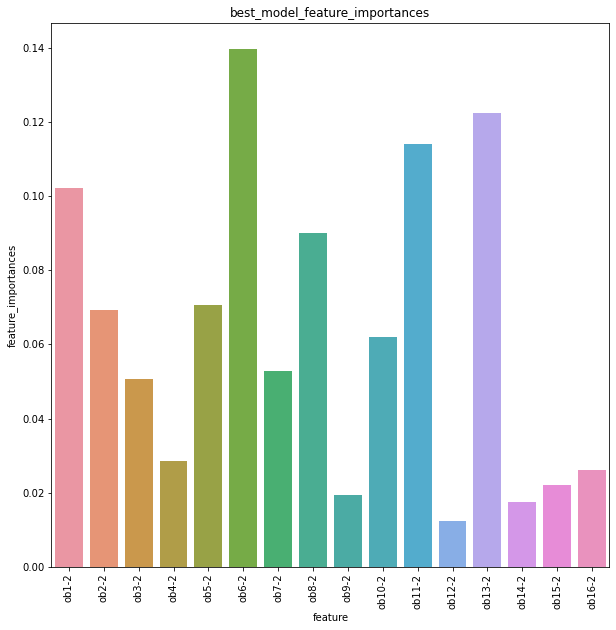

In [127]:
# feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
## 피쳐마다 비슷하게 생성되었기 때문에 수치가 비슷하게 생성된 것을 알 수 있음

import seaborn as sns

ft_importances = pd.Series(best_feature_importances)

plt.figure(figsize=(10,10))
n_features = X.shape[1]
idx = np.arange(n_features)
plt.xticks(np.arange(n_features))
plt.xticks(idx, col_names[:])
plt.xlim(-1, n_features)

plt.title("best_model_feature_importances")
plt.xlabel("feature")
plt.ylabel("feature_importances")
sns.barplot(col_names[:], y = ft_importances)
plt.tick_params('x', rotation = 90)
plt.show()

In [128]:
params = gs.best_params_
params

{'learning_rate': 0.09000000000000001,
 'max_depth': 3,
 'max_features': 4,
 'n_estimators': 301}

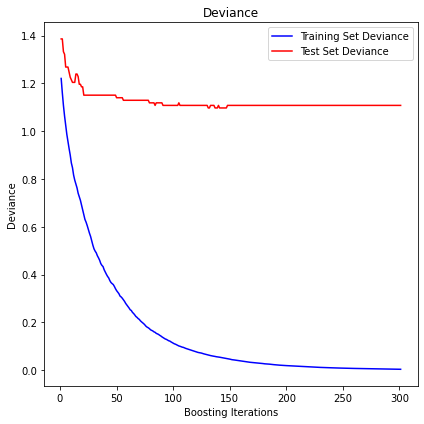

In [129]:
# train, test deviance graph
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(best_gsb_estimator.staged_predict(X_test)):
    test_score[i] = best_gsb_estimator.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, best_gsb_estimator.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [130]:
print("Train Accuracy: %.4f" %best_gsb_estimator.score(X_train, y_train))
print("Test Accuracy: %.4f" %best_gsb_estimator.score(X_test, y_test))

Train Accuracy: 1.0000
Test Accuracy: 0.9437


In [131]:
best_gsb_estimator

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.09000000000000001, loss='deviance',
                           max_depth=3, max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=301,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

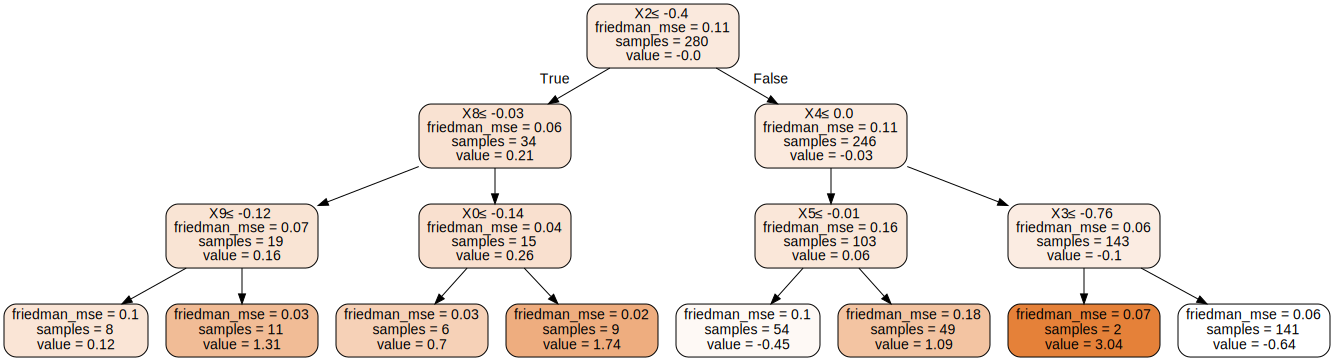

In [132]:
# GB 중 일부 트리 graph화
estimator = best_gsb_estimator.estimators_[15][0]

dot_data = tree.export_graphviz(estimator, 
                rounded = True, proportion = False, 
                precision = 2, filled = True,
                special_characters=True)

graph = graphviz.Source(dot_data)  
graph

#### Confusion Matrix

In [133]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
y_pred = best_gsb_estimator.predict(X_test)

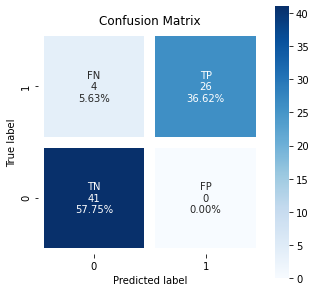

In [135]:
con_mat = confusion_matrix(y_test, y_pred, labels=[0,1])

group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in con_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in con_mat.flatten()/np.sum(con_mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(con_mat, annot=labels, cmap = "Blues", fmt="", linewidths=10, square=True)
ax.set_ylim([0,2])
ax.set_title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label' + "")
plt.show()

#### AUROC

In [136]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

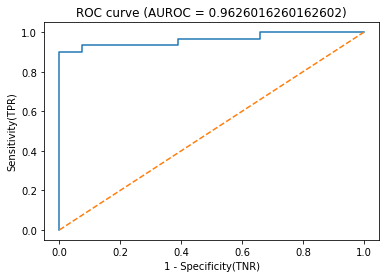

In [137]:
fpr, tpr, thresholds = roc_curve(y_test, best_gsb_estimator.decision_function(X_test)) 

plt.plot(fpr, tpr)
#plt.fill_between(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('1 - Specificity(TNR)')
#plt.xlabel('거짓 양성 비율(FPR)')
plt.ylabel('Sensitivity(TPR)')

auc_s = auc(fpr, tpr) # auc(score)
plt.title('ROC curve (AUROC = {})'.format(auc_s))
plt.show()

#### 각 성능 지표

In [138]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        41
           1       1.00      0.87      0.93        30

    accuracy                           0.94        71
   macro avg       0.96      0.93      0.94        71
weighted avg       0.95      0.94      0.94        71



In [140]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f"Precision: {precision_score(y_test, y_pred, average='binary')}")
print(f"Recall: {recall_score(y_test, y_pred, average='binary')}")
print(f"F1-score: {f1_score(y_test, y_pred, average='binary')}")

Accuracy: 0.9436619718309859
Precision: 1.0
Recall: 0.8666666666666667
F1-score: 0.9285714285714286


## 5. KNN

### 5.1 train test 분리

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.head()

6      0
52     0
114    1
45     1
106    1
Name: target, dtype: int64

### 5.2 modeling

In [49]:
from sklearn.neighbors import KNeighborsClassifier

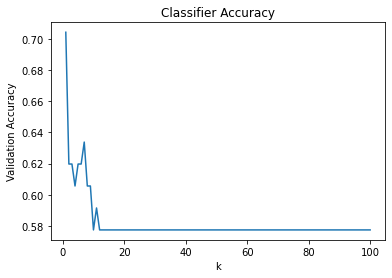

In [50]:
k_list = range(1,101)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.show()

In [51]:
accuracies.index(max(accuracies))

0

In [52]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [53]:
# train 성능 #
knn.score(X_train, y_train)

1.0

In [54]:
y_pred = knn.predict(X_test)

In [55]:
# test 성능 #
knn.score(X_test, y_test)

0.704225352112676